# =============================================================================
# 1. IMPORT LIBRARIES
# =============================================================================


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


# =============================================================================
# 2. LOAD DATASET
# =============================================================================


In [7]:
def load_data(file_path):
    """
    Load the dataset from the specified path
    
    Args:
        file_path (str): Path to the CSV file
    
    Returns:
        pd.DataFrame: Loaded dataset
    """
    try:
        data = pd.read_csv(file_path)
        print(f"✅ Dataset loaded successfully!")
        print(f"📊 Dataset shape: {data.shape}")
        return data
    except FileNotFoundError:
        print("❌ File not found. Please check the file path.")
        return None
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None

# Load the dataset
data = pd.read_csv('/kaggle/input/boston-house-prices/housing.csv', header=None, sep='\s+')


In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] # Replace with the actual column names from your dataset
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0



📈 EXPLORATORY DATA ANALYSIS

🔍 First 5 rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    5

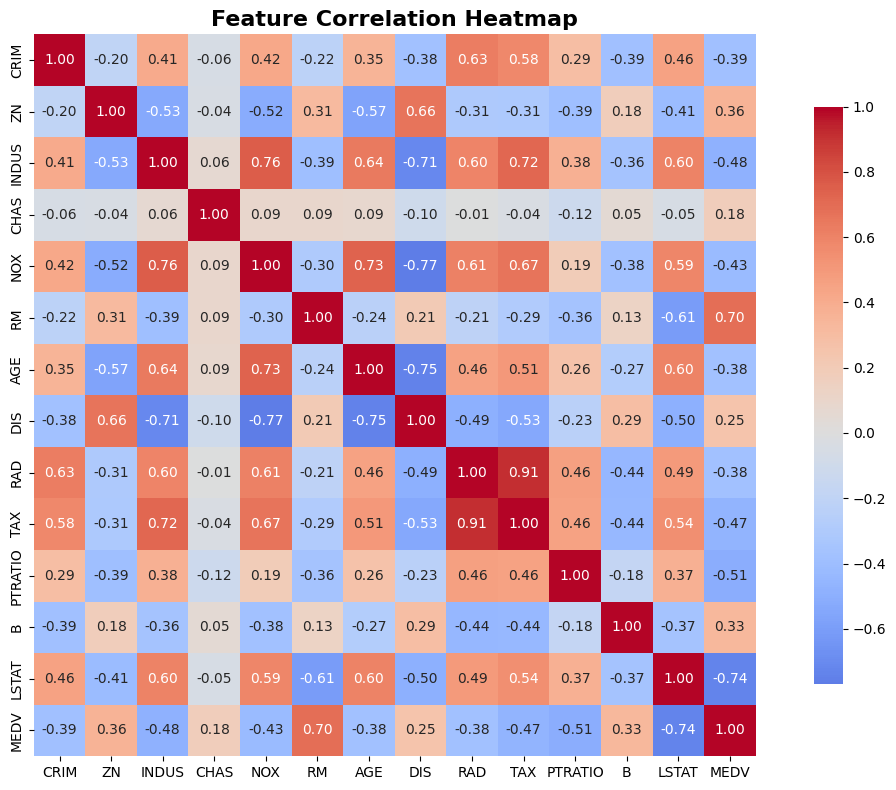


📦 Checking for Outliers using Boxplots...


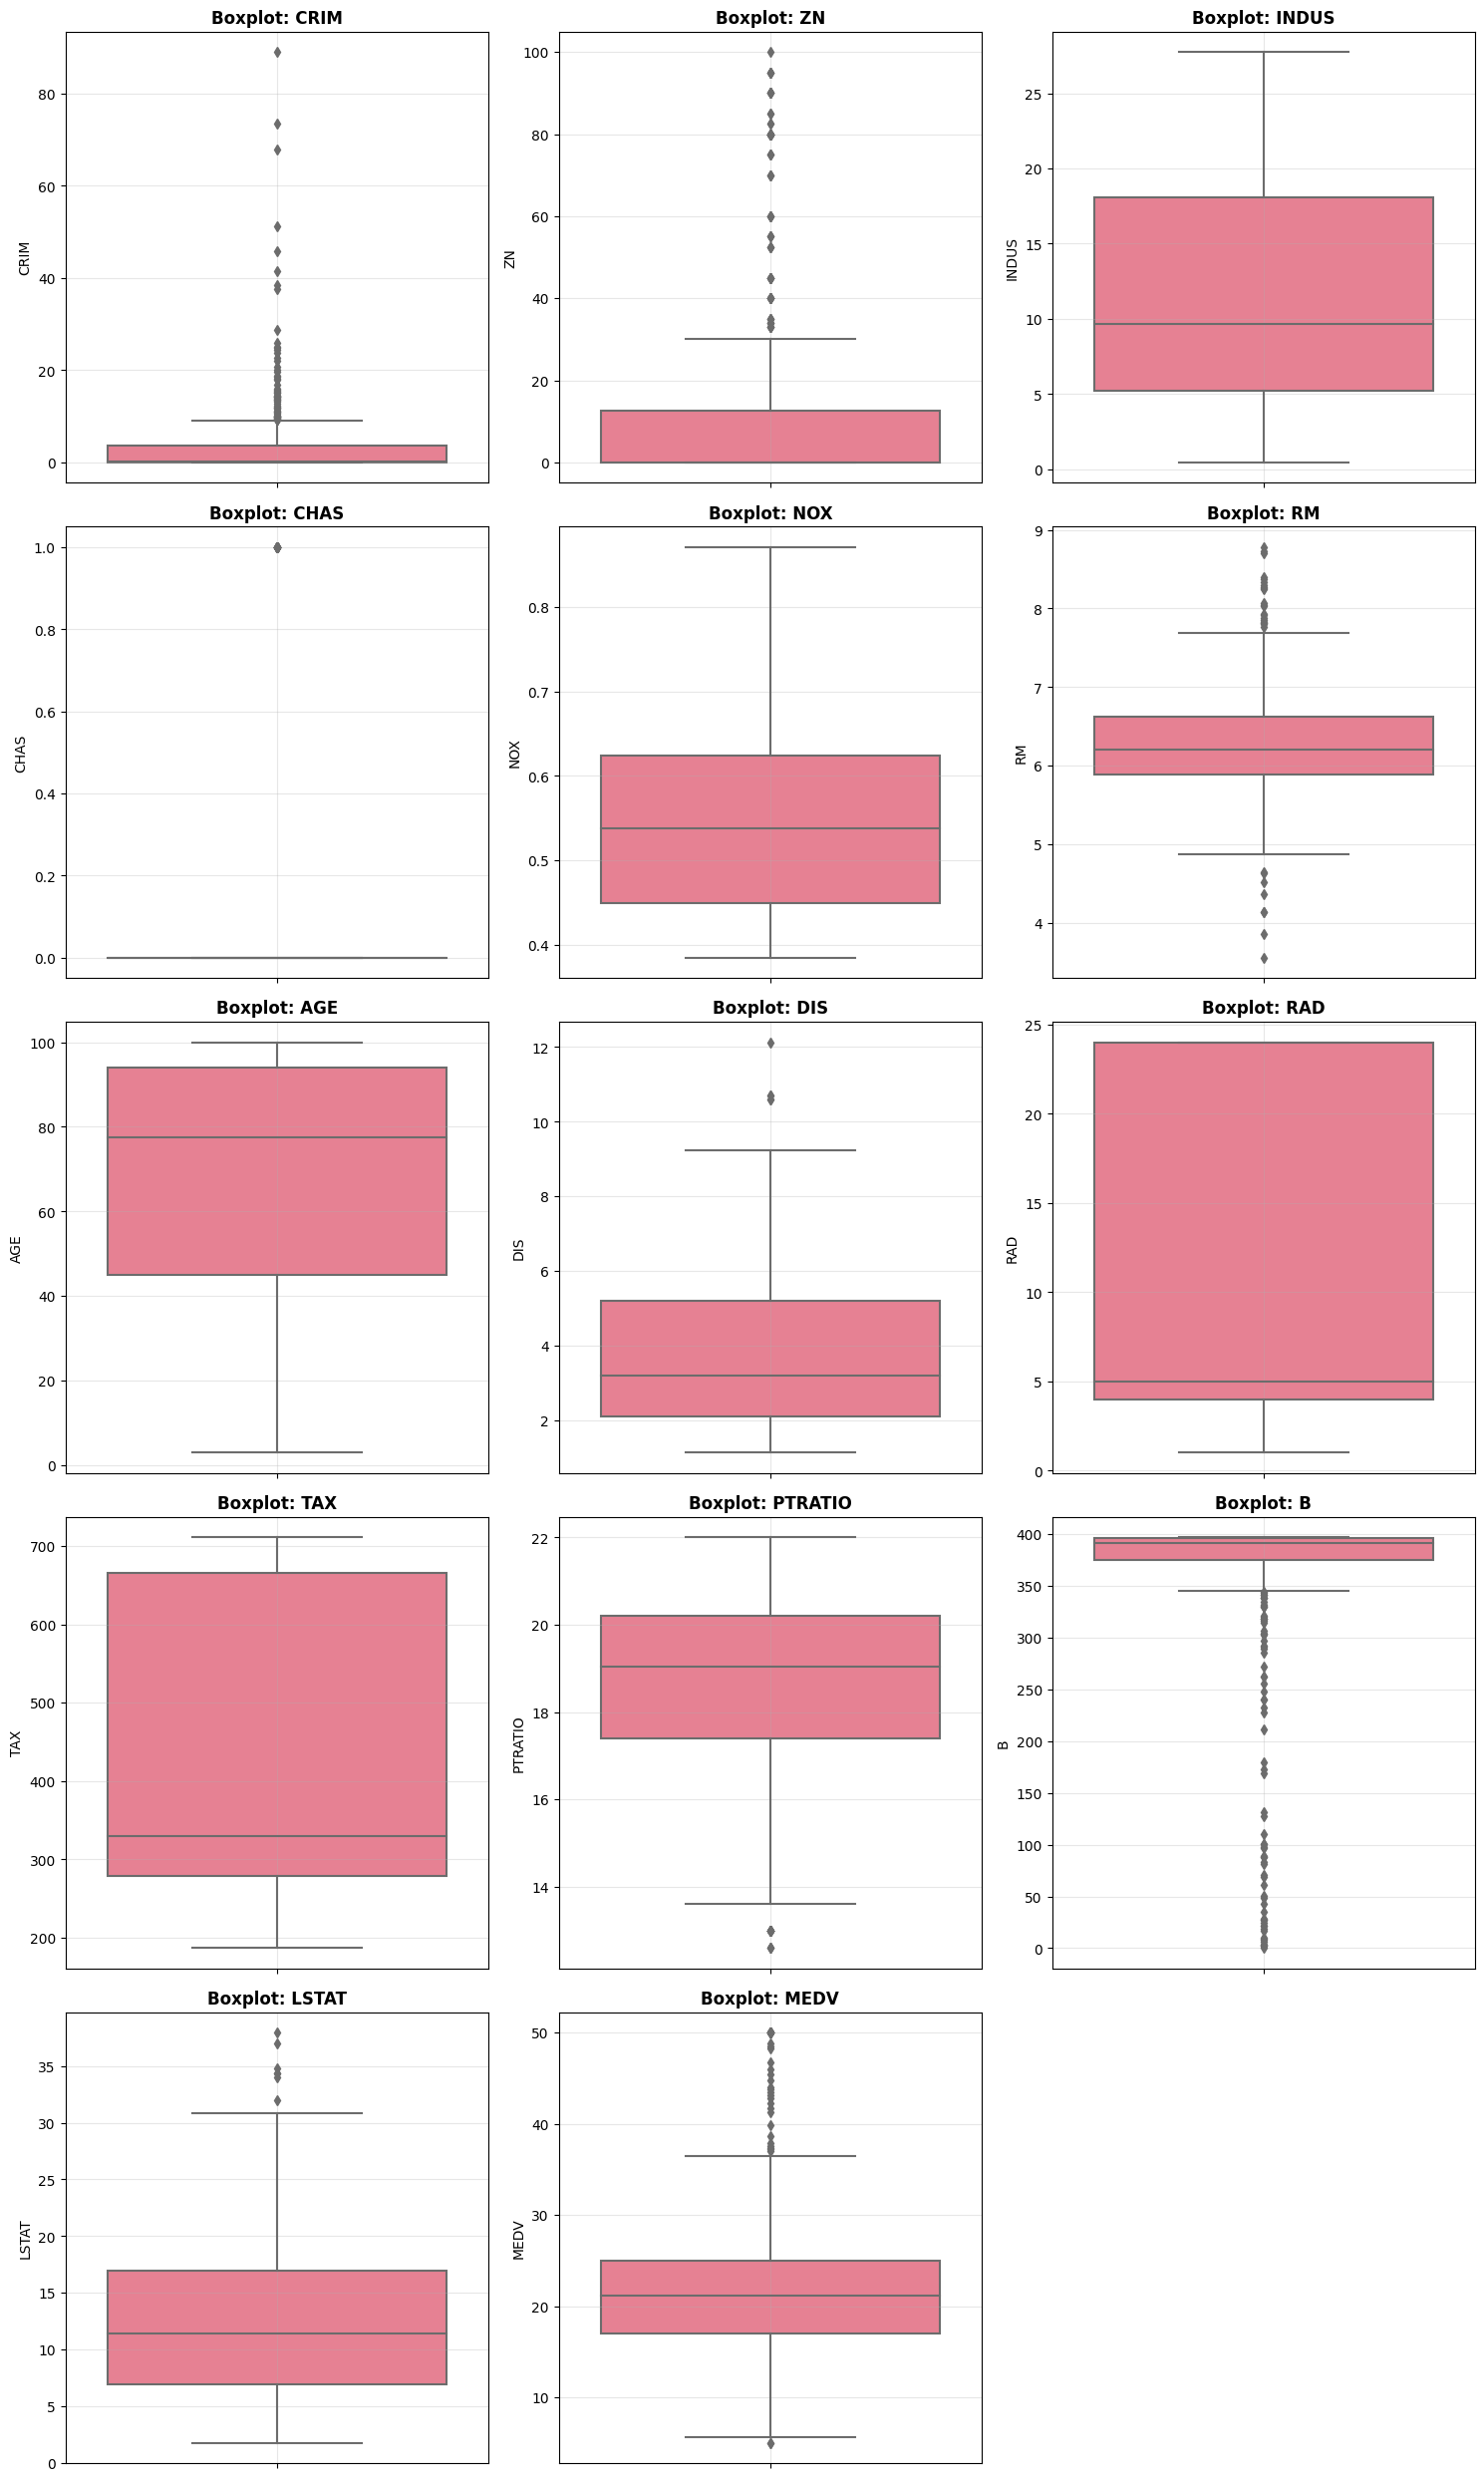


📊 Outlier Analysis using IQR method:
   CRIM: 66 outliers (13.0%)
   ZN: 68 outliers (13.4%)
   CHAS: 35 outliers (6.9%)
   RM: 30 outliers (5.9%)
   DIS: 5 outliers (1.0%)
   PTRATIO: 15 outliers (3.0%)
   B: 77 outliers (15.2%)
   LSTAT: 7 outliers (1.4%)
   MEDV: 40 outliers (7.9%)


In [10]:
def perform_eda(df):
    """
    Perform comprehensive exploratory data analysis
    
    Args:
        df (pd.DataFrame): Input dataset
    """
    print("\n" + "="*50)
    print("📈 EXPLORATORY DATA ANALYSIS")
    print("="*50)
    
    # Display first few rows
    print("\n🔍 First 5 rows of the dataset:")
    print(df.head())
    
    # Dataset info
    print("\n📋 Dataset Information:")
    print(df.info())
    
    # Check for missing values
    print("\n🔍 Missing Values:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")
    
    # Summary statistics
    print("\n📊 Summary Statistics:")
    print(df.describe())
    
    # Data types
    print("\n📋 Data Types:")
    print(df.dtypes)
    
    return df

# Perform EDA
data = perform_eda(data)

def plot_correlation_heatmap(df):
    """
    Plot correlation heatmap for numerical features
    
    Args:
        df (pd.DataFrame): Input dataset
    """
    print("\n🔥 Creating Correlation Heatmap...")
    
    # Select only numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[numerical_cols].corr()
    
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={'shrink': 0.8})
    
    plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Plot correlation heatmap
plot_correlation_heatmap(data)

def detect_and_plot_outliers(df):
    """
    Detect and visualize outliers using boxplots
    
    Args:
        df (pd.DataFrame): Input dataset
    """
    print("\n📦 Checking for Outliers using Boxplots...")
    
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    # Calculate number of rows and columns for subplots
    n_cols = 3
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            sns.boxplot(data=df, y=col, ax=axes[i])
            axes[i].set_title(f'Boxplot: {col}', fontweight='bold')
            axes[i].grid(True, alpha=0.3)
    
    # Hide unused subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Print outlier statistics
    print("\n📊 Outlier Analysis using IQR method:")
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if len(outliers) > 0:
            print(f"   {col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

# Detect outliers
detect_and_plot_outliers(data)


# =============================================================================
# 3.5. OUTLIER HANDLING WITH IQR METHOD
# =============================================================================



📋 OUTLIER HANDLING METHODS AVAILABLE:
--------------------------------------------------
1. 'remove'        - Remove outlier rows entirely
2. 'cap'           - Cap outliers to IQR bounds
3. 'log_transform' - Apply log transformation

💡 Recommendation: Use 'cap' for preserving data size
                   Use 'remove' for cleaner data (may lose information)

🔧 Applying outlier handling with method: cap

🔧 OUTLIER HANDLING WITH IQR METHOD
📊 Processing 14 numerical columns...
🔧 Method: CAP
📐 IQR Multiplier: 1.5

🔍 Processing column: CRIM
   📈 Found 66 outliers (13.0%)
   📉 Range: [-5.31, 9.07]
   🧢 Capped 66 outlier(s) to bounds

🔍 Processing column: ZN
   📈 Found 68 outliers (13.4%)
   📉 Range: [-18.75, 31.25]
   🧢 Capped 68 outlier(s) to bounds

🔍 Processing column: INDUS
   ✅ No outliers found

🔍 Processing column: CHAS
   📈 Found 35 outliers (6.9%)
   📉 Range: [0.00, 0.00]
   🧢 Capped 35 outlier(s) to bounds

🔍 Processing column: NOX
   ✅ No outliers found

🔍 Processing column: RM
  

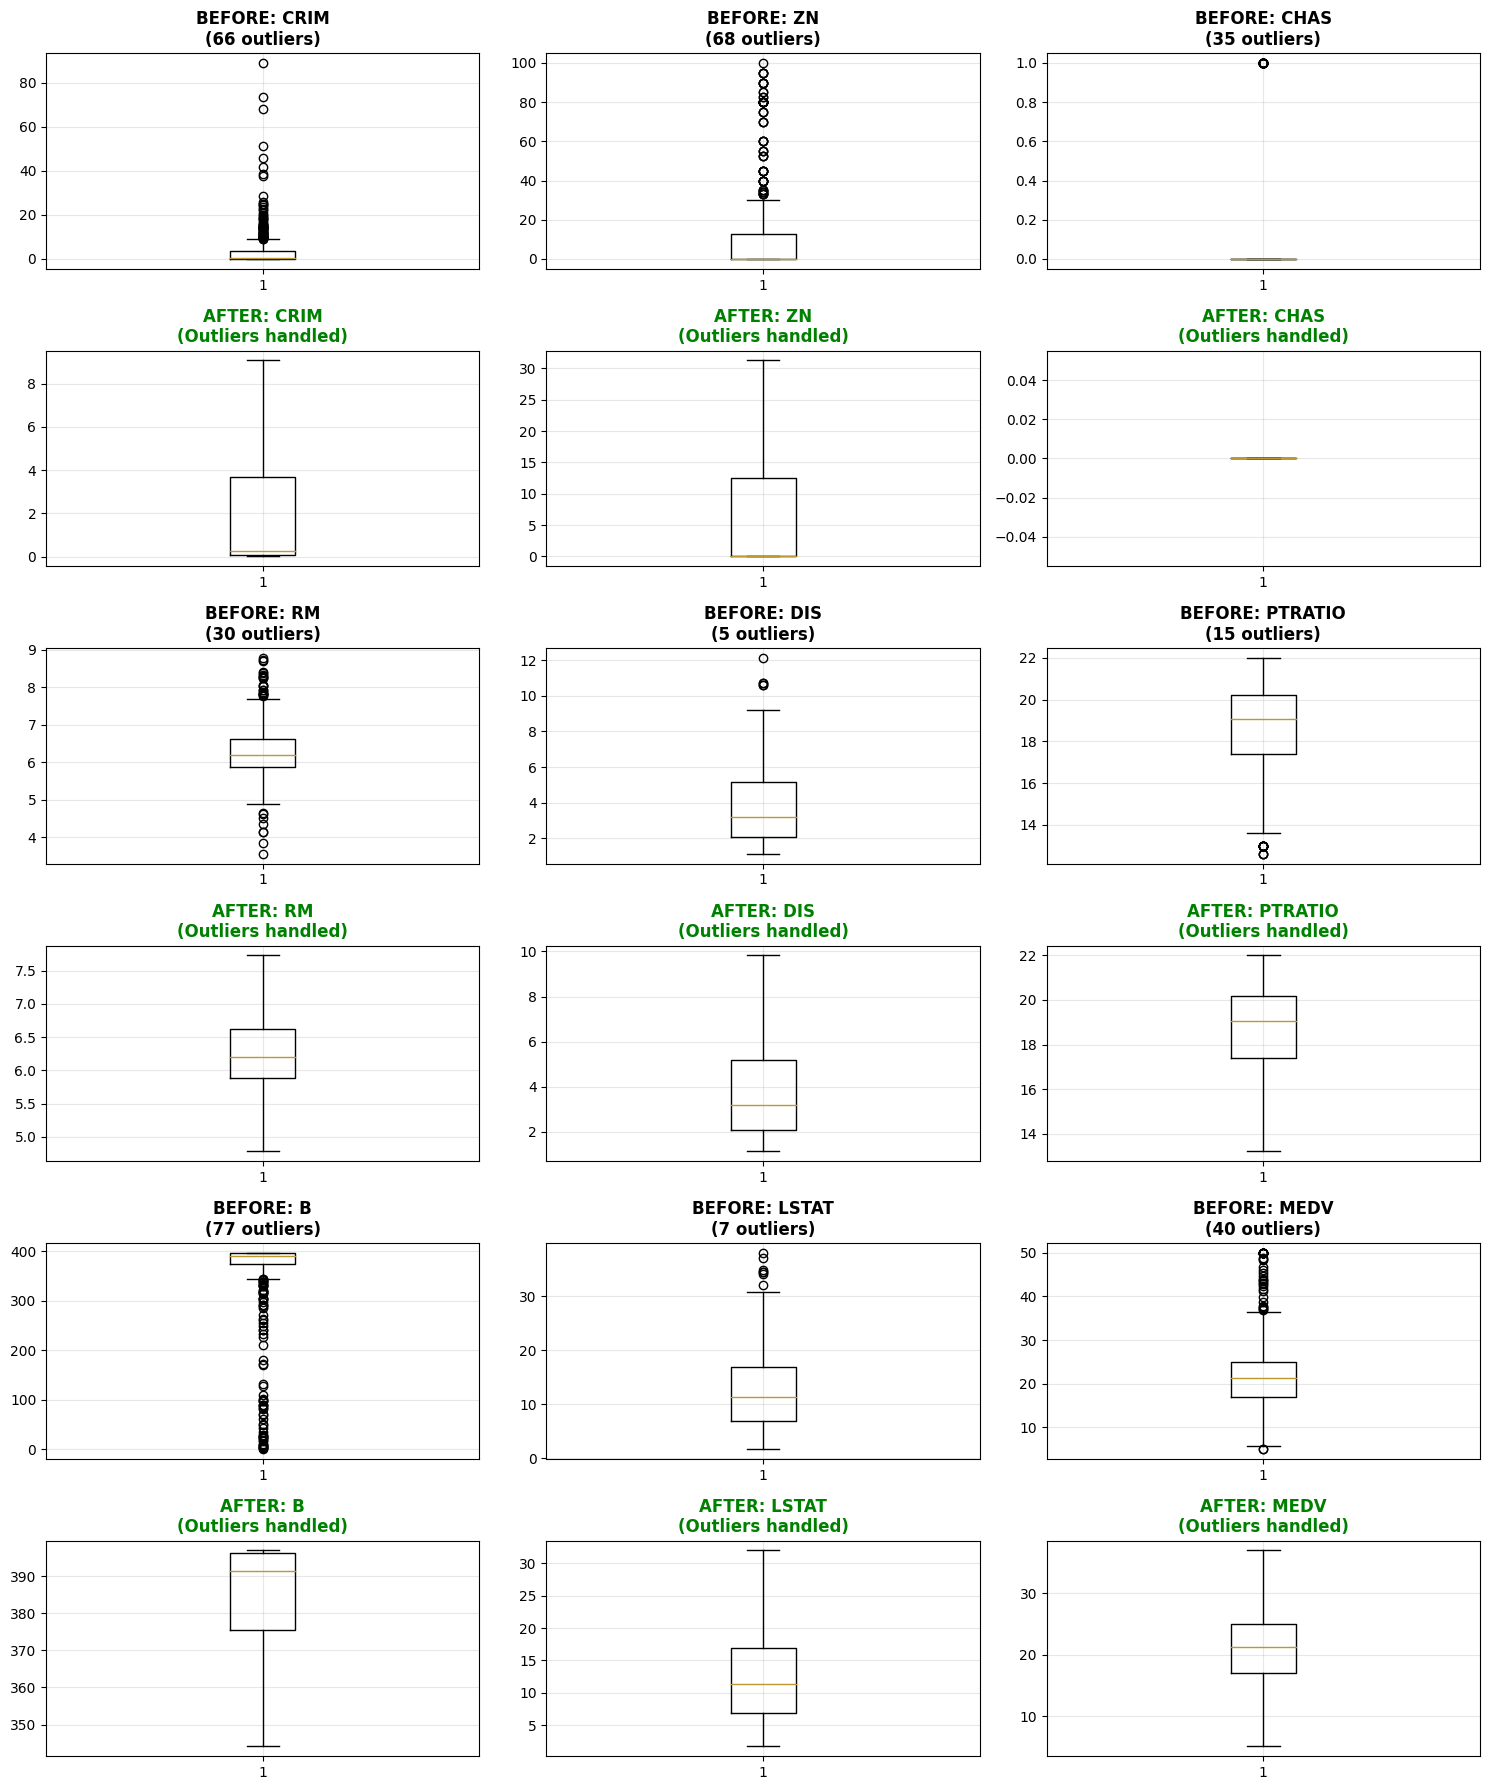

In [12]:
def handle_outliers_iqr(df, method='remove', multiplier=1.5):
    """
    Handle outliers using IQR (Interquartile Range) method
    
    Args:
        df (pd.DataFrame): Input dataset
        method (str): Method to handle outliers ('remove', 'cap', 'log_transform')
        multiplier (float): IQR multiplier for outlier detection (default: 1.5)
    
    Returns:
        pd.DataFrame: Dataset with outliers handled
        dict: Summary of outlier handling
    """
    print("\n" + "="*50)
    print("🔧 OUTLIER HANDLING WITH IQR METHOD")
    print("="*50)
    
    df_clean = df.copy()
    outlier_summary = {}
    
    # Get numerical columns only
    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
    
    print(f"📊 Processing {len(numerical_cols)} numerical columns...")
    print(f"🔧 Method: {method.upper()}")
    print(f"📐 IQR Multiplier: {multiplier}")
    
    original_shape = df_clean.shape[0]
    
    for col in numerical_cols:
        print(f"\n🔍 Processing column: {col}")
        
        # Calculate Q1, Q3, and IQR
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        # Identify outliers
        outliers_mask = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
        outliers_count = outliers_mask.sum()
        outliers_percentage = (outliers_count / len(df_clean)) * 100
        
        if outliers_count > 0:
            print(f"   📈 Found {outliers_count} outliers ({outliers_percentage:.1f}%)")
            print(f"   📉 Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
            
            # Store outlier information
            outlier_summary[col] = {
                'count': outliers_count,
                'percentage': outliers_percentage,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'original_min': df_clean[col].min(),
                'original_max': df_clean[col].max()
            }
            
            # Apply outlier handling method
            if method == 'remove':
                # Remove outliers
                df_clean = df_clean[~outliers_mask]
                print(f"   ✂️ Removed {outliers_count} outlier(s)")
                
            elif method == 'cap':
                # Cap outliers to bounds
                df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound
                df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
                print(f"   🧢 Capped {outliers_count} outlier(s) to bounds")
                
            elif method == 'log_transform':
                # Apply log transformation (only for positive values)
                if df_clean[col].min() > 0:
                    df_clean[col] = np.log1p(df_clean[col])  # log1p for stability
                    print(f"   📊 Applied log transformation to {col}")
                else:
                    # If negative values exist, use capping instead
                    df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound
                    df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
                    print(f"   🧢 Capped {outliers_count} outlier(s) (log transform not applicable)")
        else:
            print(f"   ✅ No outliers found")
    
    final_shape = df_clean.shape[0]
    removed_rows = original_shape - final_shape
    
    print(f"\n📊 OUTLIER HANDLING SUMMARY:")
    print(f"   📋 Original dataset shape: {original_shape}")
    print(f"   📋 Final dataset shape: {final_shape}")
    if method == 'remove' and removed_rows > 0:
        print(f"   ✂️ Rows removed: {removed_rows} ({(removed_rows/original_shape)*100:.1f}%)")
    
    return df_clean, outlier_summary

def visualize_outlier_treatment(df_original, df_treated, outlier_summary):
    """
    Visualize the effect of outlier treatment
    
    Args:
        df_original (pd.DataFrame): Original dataset
        df_treated (pd.DataFrame): Dataset after outlier treatment
        outlier_summary (dict): Summary of outlier handling
    """
    if not outlier_summary:
        print("✅ No outliers were found, so no visualization needed.")
        return
    
    print("\n📊 Creating Before/After Outlier Treatment Visualization...")
    
    # Get columns that had outliers
    outlier_cols = list(outlier_summary.keys())
    n_cols = min(3, len(outlier_cols))  # Max 3 columns per row
    n_rows = (len(outlier_cols) + n_cols - 1) // n_cols
    
    if n_rows > 0:
        fig, axes = plt.subplots(n_rows * 2, n_cols, figsize=(15, 6 * n_rows))
        if n_rows == 1 and n_cols == 1:
            axes = np.array([[axes[0]], [axes[1]]])
        elif n_rows == 1:
            axes = axes.reshape(2, -1)
        elif n_cols == 1:
            axes = axes.reshape(-1, 1)
        
        for i, col in enumerate(outlier_cols[:n_cols * n_rows]):
            row = i // n_cols
            col_idx = i % n_cols
            
            # Before treatment (top row)
            axes[row * 2, col_idx].boxplot(df_original[col])
            axes[row * 2, col_idx].set_title(f'BEFORE: {col}\n({outlier_summary[col]["count"]} outliers)', 
                                           fontweight='bold')
            axes[row * 2, col_idx].grid(True, alpha=0.3)
            
            # After treatment (bottom row)
            if col in df_treated.columns:  # Check if column still exists after treatment
                axes[row * 2 + 1, col_idx].boxplot(df_treated[col])
                axes[row * 2 + 1, col_idx].set_title(f'AFTER: {col}\n(Outliers handled)', 
                                                    fontweight='bold', color='green')
                axes[row * 2 + 1, col_idx].grid(True, alpha=0.3)
        
        # Hide unused subplots
        total_used = len(outlier_cols) * 2
        total_subplots = n_rows * n_cols * 2
        for i in range(total_used, total_subplots):
            row = i // n_cols
            col_idx = i % n_cols
            if row < axes.shape[0] and col_idx < axes.shape[1]:
                axes[row, col_idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()

def choose_outlier_method():
    """
    Display information about different outlier handling methods
    """
    print("\n📋 OUTLIER HANDLING METHODS AVAILABLE:")
    print("-" * 50)
    print("1. 'remove'        - Remove outlier rows entirely")
    print("2. 'cap'           - Cap outliers to IQR bounds")  
    print("3. 'log_transform' - Apply log transformation")
    print("\n💡 Recommendation: Use 'cap' for preserving data size")
    print("                   Use 'remove' for cleaner data (may lose information)")

# Display outlier handling options
choose_outlier_method()

# Apply outlier handling - You can change the method here
OUTLIER_METHOD = 'cap'  # Options: 'remove', 'cap', 'log_transform'
OUTLIER_MULTIPLIER = 1.5  # Standard IQR multiplier

print(f"\n🔧 Applying outlier handling with method: {OUTLIER_METHOD}")
data_no_outliers, outlier_info = handle_outliers_iqr(
    data, 
    method=OUTLIER_METHOD, 
    multiplier=OUTLIER_MULTIPLIER
)

# Visualize outlier treatment
visualize_outlier_treatment(data, data_no_outliers, outlier_info)


# =============================================================================
# 4. DATA PREPROCESSING
# =============================================================================


In [13]:

def preprocess_data(df):
    """
    Preprocess the data: handle missing values, encode categorical features
    
    Args:
        df (pd.DataFrame): Input dataset
    
    Returns:
        pd.DataFrame: Preprocessed dataset
    """
    print("\n" + "="*50)
    print("🔧 DATA PREPROCESSING")
    print("="*50)
    
    df_processed = df.copy()
    
    # Handle missing values
    print("\n🔍 Handling Missing Values...")
    if df_processed.isnull().sum().sum() == 0:
        print("✅ No missing values found!")
    else:
        # Fill numerical missing values with median
        numerical_cols = df_processed.select_dtypes(include=[np.number]).columns
        for col in numerical_cols:
            if df_processed[col].isnull().sum() > 0:
                df_processed[col].fillna(df_processed[col].median(), inplace=True)
                print(f"   Filled missing values in {col} with median")
        
        # Fill categorical missing values with mode
        categorical_cols = df_processed.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            if df_processed[col].isnull().sum() > 0:
                df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
                print(f"   Filled missing values in {col} with mode")
    
    # Encode categorical features
    print("\n🏷️ Encoding Categorical Features...")
    categorical_cols = df_processed.select_dtypes(include=['object']).columns
    
    if len(categorical_cols) > 0:
        le = LabelEncoder()
        for col in categorical_cols:
            df_processed[col] = le.fit_transform(df_processed[col])
            print(f"   Encoded {col} using Label Encoding")
    else:
        print("✅ No categorical features found!")
    
    print(f"\n✅ Preprocessing complete! Final shape: {df_processed.shape}")
    return df_processed

# Preprocess data
data_processed = preprocess_data(data)



🔧 DATA PREPROCESSING

🔍 Handling Missing Values...
✅ No missing values found!

🏷️ Encoding Categorical Features...
✅ No categorical features found!

✅ Preprocessing complete! Final shape: (506, 14)


# =============================================================================
# 5. FEATURE SCALING AND TRAIN-TEST SPLIT
# =============================================================================


In [14]:
def prepare_features_and_split(df, target_column):
    """
    Prepare features, scale them, and split into train-test sets
    
    Args:
        df (pd.DataFrame): Preprocessed dataset
        target_column (str): Name of target column
    
    Returns:
        tuple: X_train, X_test, y_train, y_test, scaler
    """
    print("\n" + "="*50)
    print("🎯 FEATURE PREPARATION AND TRAIN-TEST SPLIT")
    print("="*50)
    
    # Identify target column (assuming it's 'price', 'medv', or similar)
    possible_targets = ['price', 'medv', 'target', 'MEDV', 'PRICE']
    
    if target_column not in df.columns:
        # Try to find target column automatically
        target_column = None
        for col in possible_targets:
            if col in df.columns:
                target_column = col
                break
        
        if target_column is None:
            # Use the last column as target
            target_column = df.columns[-1]
            print(f"⚠️ Target column auto-selected: {target_column}")
    
    print(f"🎯 Target variable: {target_column}")
    
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    print(f"📊 Features shape: {X.shape}")
    print(f"🎯 Target shape: {y.shape}")
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=None
    )
    
    print(f"📚 Training set: {X_train.shape[0]} samples")
    print(f"🧪 Testing set: {X_test.shape[0]} samples")
    
    # Feature scaling
    print("\n⚖️ Applying feature scaling...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print("✅ Feature scaling complete!")
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, list(X.columns)

# Prepare data (let's assume the target column name - will be auto-detected)
X_train, X_test, y_train, y_test, scaler, feature_names = prepare_features_and_split(
    data_processed, target_column='medv'  # Common name for Boston housing
)



🎯 FEATURE PREPARATION AND TRAIN-TEST SPLIT
🎯 Target variable: MEDV
📊 Features shape: (506, 13)
🎯 Target shape: (506,)
📚 Training set: 404 samples
🧪 Testing set: 102 samples

⚖️ Applying feature scaling...
✅ Feature scaling complete!


# =============================================================================
# 6. MODEL TRAINING
# =============================================================================



In [15]:
def train_models(X_train, y_train):
    """
    Train multiple regression models
    
    Args:
        X_train: Training features
        y_train: Training target
    
    Returns:
        dict: Dictionary of trained models
    """
    print("\n" + "="*50)
    print("🤖 MODEL TRAINING")
    print("="*50)
    
    models = {}
    
    # Linear Regression
    print("\n📈 Training Linear Regression...")
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    models['Linear Regression'] = lr
    print("✅ Linear Regression trained!")
    
    # Random Forest Regressor
    print("\n🌲 Training Random Forest Regressor...")
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    models['Random Forest'] = rf
    print("✅ Random Forest trained!")
    
    return models

# Train models
models = train_models(X_train, y_train)


🤖 MODEL TRAINING

📈 Training Linear Regression...
✅ Linear Regression trained!

🌲 Training Random Forest Regressor...
✅ Random Forest trained!


# =============================================================================
# 7. MODEL EVALUATION
# =============================================================================


In [16]:
def evaluate_models(models, X_test, y_test):
    """
    Evaluate trained models using multiple metrics
    
    Args:
        models (dict): Dictionary of trained models
        X_test: Test features
        y_test: Test target
    
    Returns:
        dict: Dictionary containing predictions and metrics
    """
    print("\n" + "="*50)
    print("📊 MODEL EVALUATION")
    print("="*50)
    
    results = {}
    
    for model_name, model in models.items():
        print(f"\n🔍 Evaluating {model_name}...")
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        # Store results
        results[model_name] = {
            'predictions': y_pred,
            'r2_score': r2,
            'mae': mae,
            'rmse': rmse
        }
        
        # Print results
        print(f"   📈 R² Score: {r2:.4f}")
        print(f"   📏 MAE: {mae:.4f}")
        print(f"   📐 RMSE: {rmse:.4f}")
    
    # Create comparison table
    print("\n📋 MODEL COMPARISON SUMMARY:")
    print("-" * 60)
    print(f"{'Model':<20} {'R²':<10} {'MAE':<10} {'RMSE':<10}")
    print("-" * 60)
    
    for model_name, metrics in results.items():
        print(f"{model_name:<20} {metrics['r2_score']:<10.4f} "
              f"{metrics['mae']:<10.4f} {metrics['rmse']:<10.4f}")
    
    return results

# Evaluate models
results = evaluate_models(models, X_test, y_test)



📊 MODEL EVALUATION

🔍 Evaluating Linear Regression...
   📈 R² Score: 0.6688
   📏 MAE: 3.1891
   📐 RMSE: 4.9286

🔍 Evaluating Random Forest...
   📈 R² Score: 0.8921
   📏 MAE: 2.0411
   📐 RMSE: 2.8130

📋 MODEL COMPARISON SUMMARY:
------------------------------------------------------------
Model                R²         MAE        RMSE      
------------------------------------------------------------
Linear Regression    0.6688     3.1891     4.9286    
Random Forest        0.8921     2.0411     2.8130    


# =============================================================================
# 8. VISUALIZATION: ACTUAL VS PREDICTED
# =============================================================================



📊 Creating Actual vs Predicted Plots...


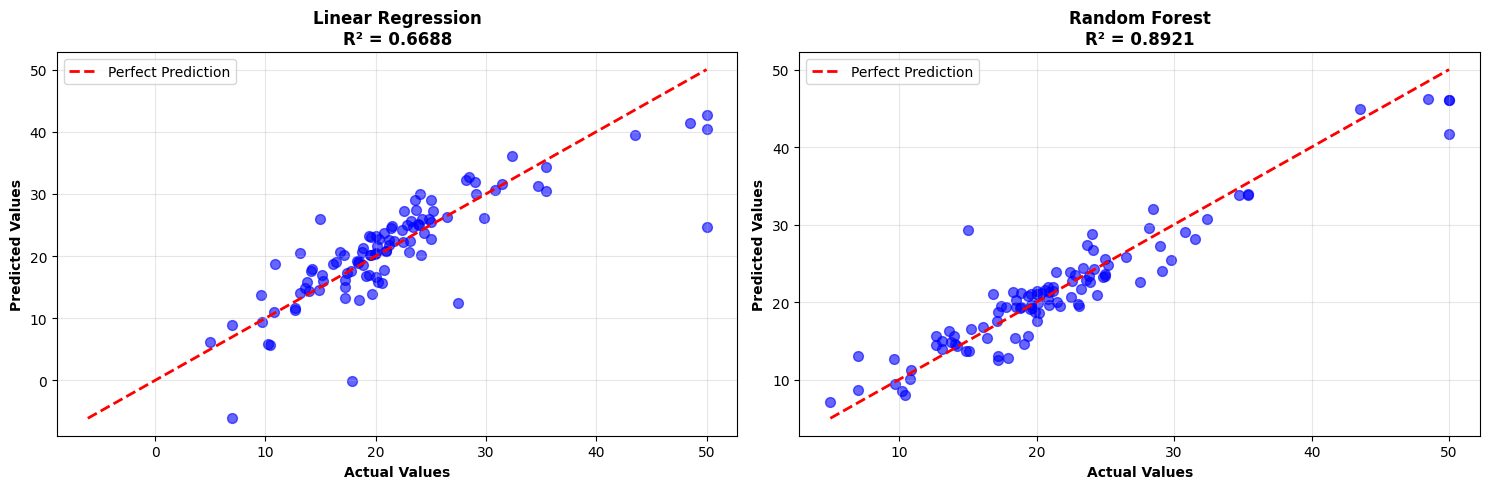

In [17]:

def plot_actual_vs_predicted(y_test, results):
    """
    Plot actual vs predicted values for all models
    
    Args:
        y_test: Actual test values
        results: Dictionary containing model predictions and metrics
    """
    print("\n📊 Creating Actual vs Predicted Plots...")
    
    fig, axes = plt.subplots(1, len(results), figsize=(15, 5))
    if len(results) == 1:
        axes = [axes]
    
    for i, (model_name, model_results) in enumerate(results.items()):
        y_pred = model_results['predictions']
        r2 = model_results['r2_score']
        
        # Scatter plot
        axes[i].scatter(y_test, y_pred, alpha=0.6, color='blue', s=50)
        
        # Perfect prediction line
        min_val = min(min(y_test), min(y_pred))
        max_val = max(max(y_test), max(y_pred))
        axes[i].plot([min_val, max_val], [min_val, max_val], 
                    'r--', lw=2, label='Perfect Prediction')
        
        # Labels and title
        axes[i].set_xlabel('Actual Values', fontweight='bold')
        axes[i].set_ylabel('Predicted Values', fontweight='bold')
        axes[i].set_title(f'{model_name}\nR² = {r2:.4f}', fontweight='bold')
        axes[i].grid(True, alpha=0.3)
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()

# Plot actual vs predicted
plot_actual_vs_predicted(y_test, results)


# =============================================================================
# 9. FEATURE IMPORTANCE (FOR RANDOM FOREST)
# =============================================================================



🎯 Feature Importance Analysis...


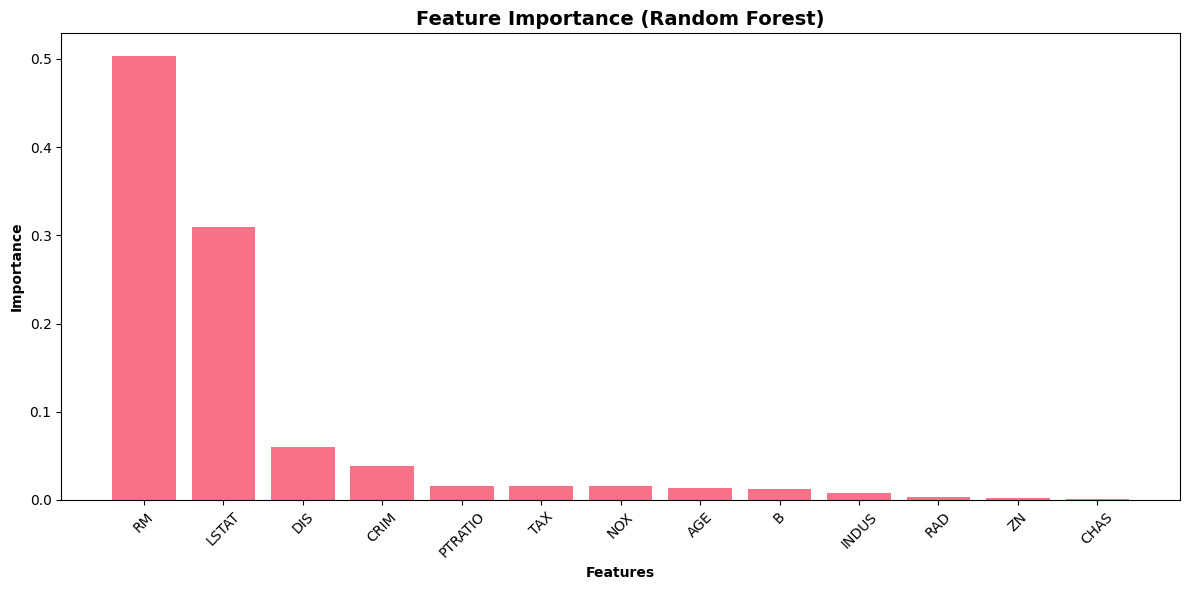


🏆 Top 5 Most Important Features:
   1. RM: 0.5038
   2. LSTAT: 0.3095
   3. DIS: 0.0605
   4. CRIM: 0.0381
   5. PTRATIO: 0.0163


In [18]:
def plot_feature_importance(model, feature_names):
    """
    Plot feature importance for Random Forest model
    
    Args:
        model: Trained Random Forest model
        feature_names: List of feature names
    """
    if hasattr(model, 'feature_importances_'):
        print("\n🎯 Feature Importance Analysis...")
        
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(12, 6))
        plt.title('Feature Importance (Random Forest)', fontweight='bold', fontsize=14)
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), 
                  [feature_names[i] for i in indices], rotation=45)
        plt.xlabel('Features', fontweight='bold')
        plt.ylabel('Importance', fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Print top 5 features
        print("\n🏆 Top 5 Most Important Features:")
        for i in range(min(5, len(feature_names))):
            idx = indices[i]
            print(f"   {i+1}. {feature_names[idx]}: {importances[idx]:.4f}")

# Plot feature importance for Random Forest
if 'Random Forest' in models:
    plot_feature_importance(models['Random Forest'], feature_names)


# =============================================================================
# 10. FINAL SUMMARY
# =============================================================================



In [19]:

def print_final_summary(results):
    """
    Print final summary of the analysis
    
    Args:
        results: Dictionary containing model results
    """
    print("\n" + "="*60)
    print("🎉 FINAL SUMMARY")
    print("="*60)
    
    # Find best model based on R² score
    best_model = max(results.items(), key=lambda x: x[1]['r2_score'])
    best_name, best_metrics = best_model
    
    print(f"\n🏆 Best Performing Model: {best_name}")
    print(f"   📈 R² Score: {best_metrics['r2_score']:.4f}")
    print(f"   📏 MAE: {best_metrics['mae']:.4f}")
    print(f"   📐 RMSE: {best_metrics['rmse']:.4f}")
    
    print(f"\n📊 Dataset Summary:")
    print(f"   📋 Total samples: {len(data_processed)}")
    print(f"   🎯 Features used: {len(feature_names)}")
    print(f"   📚 Training samples: {len(y_train)}")
    print(f"   🧪 Testing samples: {len(y_test)}")
    
    print(f"\n✅ Analysis completed successfully!")
    print("📝 The models are ready for deployment or further tuning.")

# Print final summary
print_final_summary(results)

print("\n" + "="*60)
print("🔚 END OF ANALYSIS")
print("="*60)


🎉 FINAL SUMMARY

🏆 Best Performing Model: Random Forest
   📈 R² Score: 0.8921
   📏 MAE: 2.0411
   📐 RMSE: 2.8130

📊 Dataset Summary:
   📋 Total samples: 506
   🎯 Features used: 13
   📚 Training samples: 404
   🧪 Testing samples: 102

✅ Analysis completed successfully!
📝 The models are ready for deployment or further tuning.

🔚 END OF ANALYSIS
